In [79]:
import pandas as pd
from Skriptai.manofunkcijos import *
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

def turis(x):
    if x != None:
        if 'cm³' in x:
            return float(x.replace(' cm³',''))
        
def galia(x):
    if x != None:
        if 'kW' in x:
            return float(x.split('(')[1].replace('kW)', ''))

# koreliacija
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM autopliuslt2;'  # SQL užklausa, kurią norite vykdyti
df_auto = query_to_dataframe(db_path,query)
df_auto['JS']= df_auto['Kaina'].apply(lambda x: float(x)*1.5)
df_auto['Kaina']= df_auto['Kaina'].apply(lambda x: float(x))
df_auto['Rida'] = df_auto['Rida'].apply(lambda x: int(x.replace(' ','').replace('km','')) if x != None else x)
df_auto['Amzius'] = df_auto['Pirma registracija'].apply(lambda x: 2024-int(x[:4]) if x != None else x)
df_auto['Turis'] = df_auto['Variklis'].apply(lambda x: x.split(',')[0] if x != None else None)
df_auto['Turis'] = df_auto['Turis'].apply(turis)
df_auto['Galia'] = df_auto['Variklis'].apply(galia)
df_auto['Miestas'] = df_auto['Miestas'].apply(lambda x: x.split(',')[0])
df_auto['Baterijos talpa, kWh'] = df_auto['Baterijos talpa, kWh'].apply(lambda x: float(x.replace(' kWh','')) if x != None else x)
df_auto['Elektra nuvažiuojamas atstumas'] = df_auto['Elektra nuvažiuojamas atstumas'].apply(lambda x: float(x.replace(' km','')) if x != None else x)
df_auto['Rida_group'] = df_auto['Rida'].apply(lambda x: np.ceil(x/5000)*5000 if x != None else x )

In [17]:
df_rida = df_auto[['Kaina', 'Rida_group']]
df_rida.dropna(inplace=True)
df_rida_gr = df_rida.groupby(['Rida_group'])['Kaina'].mean().reset_index()

C:\Users\manta\AppData\Local\Temp\ipykernel_27664\3830184353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rida.dropna(inplace=True)


In [ ]:
df_rida2 = df_auto[df_auto['Rida_group'].notna()][['Kaina', 'Rida_group']]

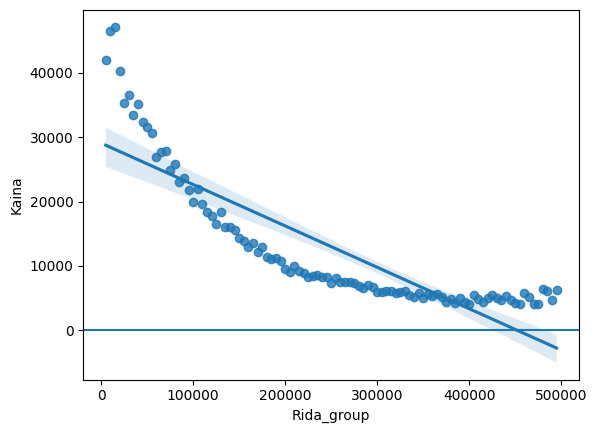

In [25]:
DM2 = df_rida_gr.query(expr='Rida_group < 500000')
ax = sns.regplot(data=df_rida_gr.query(expr='Rida_group < 500000'), x='Rida_group', y='Kaina', order=1)
ax.axhline(y=0)
plt.show()

In [26]:
import numpy.polynomial.polynomial as poly

In [49]:
coef = np.polyfit(x= DM2['Rida_group'], y = DM2['Kaina'] , deg=1)
print(coef)

[-6.43489738e-02  2.90864548e+04]


In [50]:
fn_fit = poly.Polynomial(coef[::-1])

In [51]:
fn_fit

Polynomial([ 2.90864548e+04, -6.43489738e-02], domain=[-1,  1], window=[-1,  1], symbol='x')

In [52]:
r = 300000
t_kaina = fn_fit(r)
print(t_kaina)

9781.76267311706


C:\Users\manta\AppData\Local\Temp\ipykernel_27664\4168995519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DM2['K_fit'] = kainos_fitted


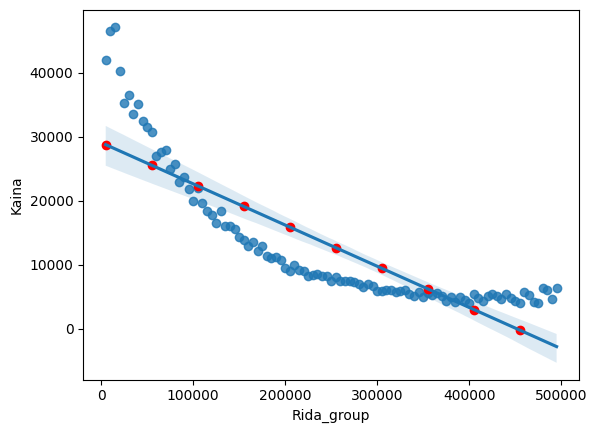

In [40]:
kainos_fitted = fn_fit(DM2['Rida_group'])
DM2['K_fit'] = kainos_fitted

ax = sns.regplot(data=DM2, x='Rida_group', y = 'Kaina', order = 1)
ax.scatter(x=DM2['Rida_group'][::10], y=DM2['K_fit'][::10], c='red')

plt.show()

[-7.10750563e-13  8.14214309e-07 -3.12073868e-01  4.54945875e+04]


C:\Users\manta\AppData\Local\Temp\ipykernel_27664\588870177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DM2['K_fit'] = kainos_fitted


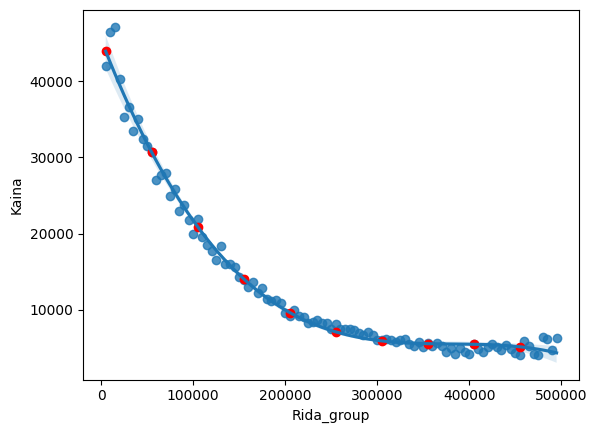

In [53]:
coef = np.polyfit(x=DM2['Rida_group'], y=DM2['Kaina'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(DM2['Rida_group'])
DM2['K_fit'] = kainos_fitted

ax = sns.regplot(data=DM2, x='Rida_group', y='Kaina', order=3)
ax.scatter(x=DM2['Rida_group'][::10], y=DM2['K_fit'][::10], c='red')

plt.show()

In [57]:
fn_fit(300000)

5961.449637431018

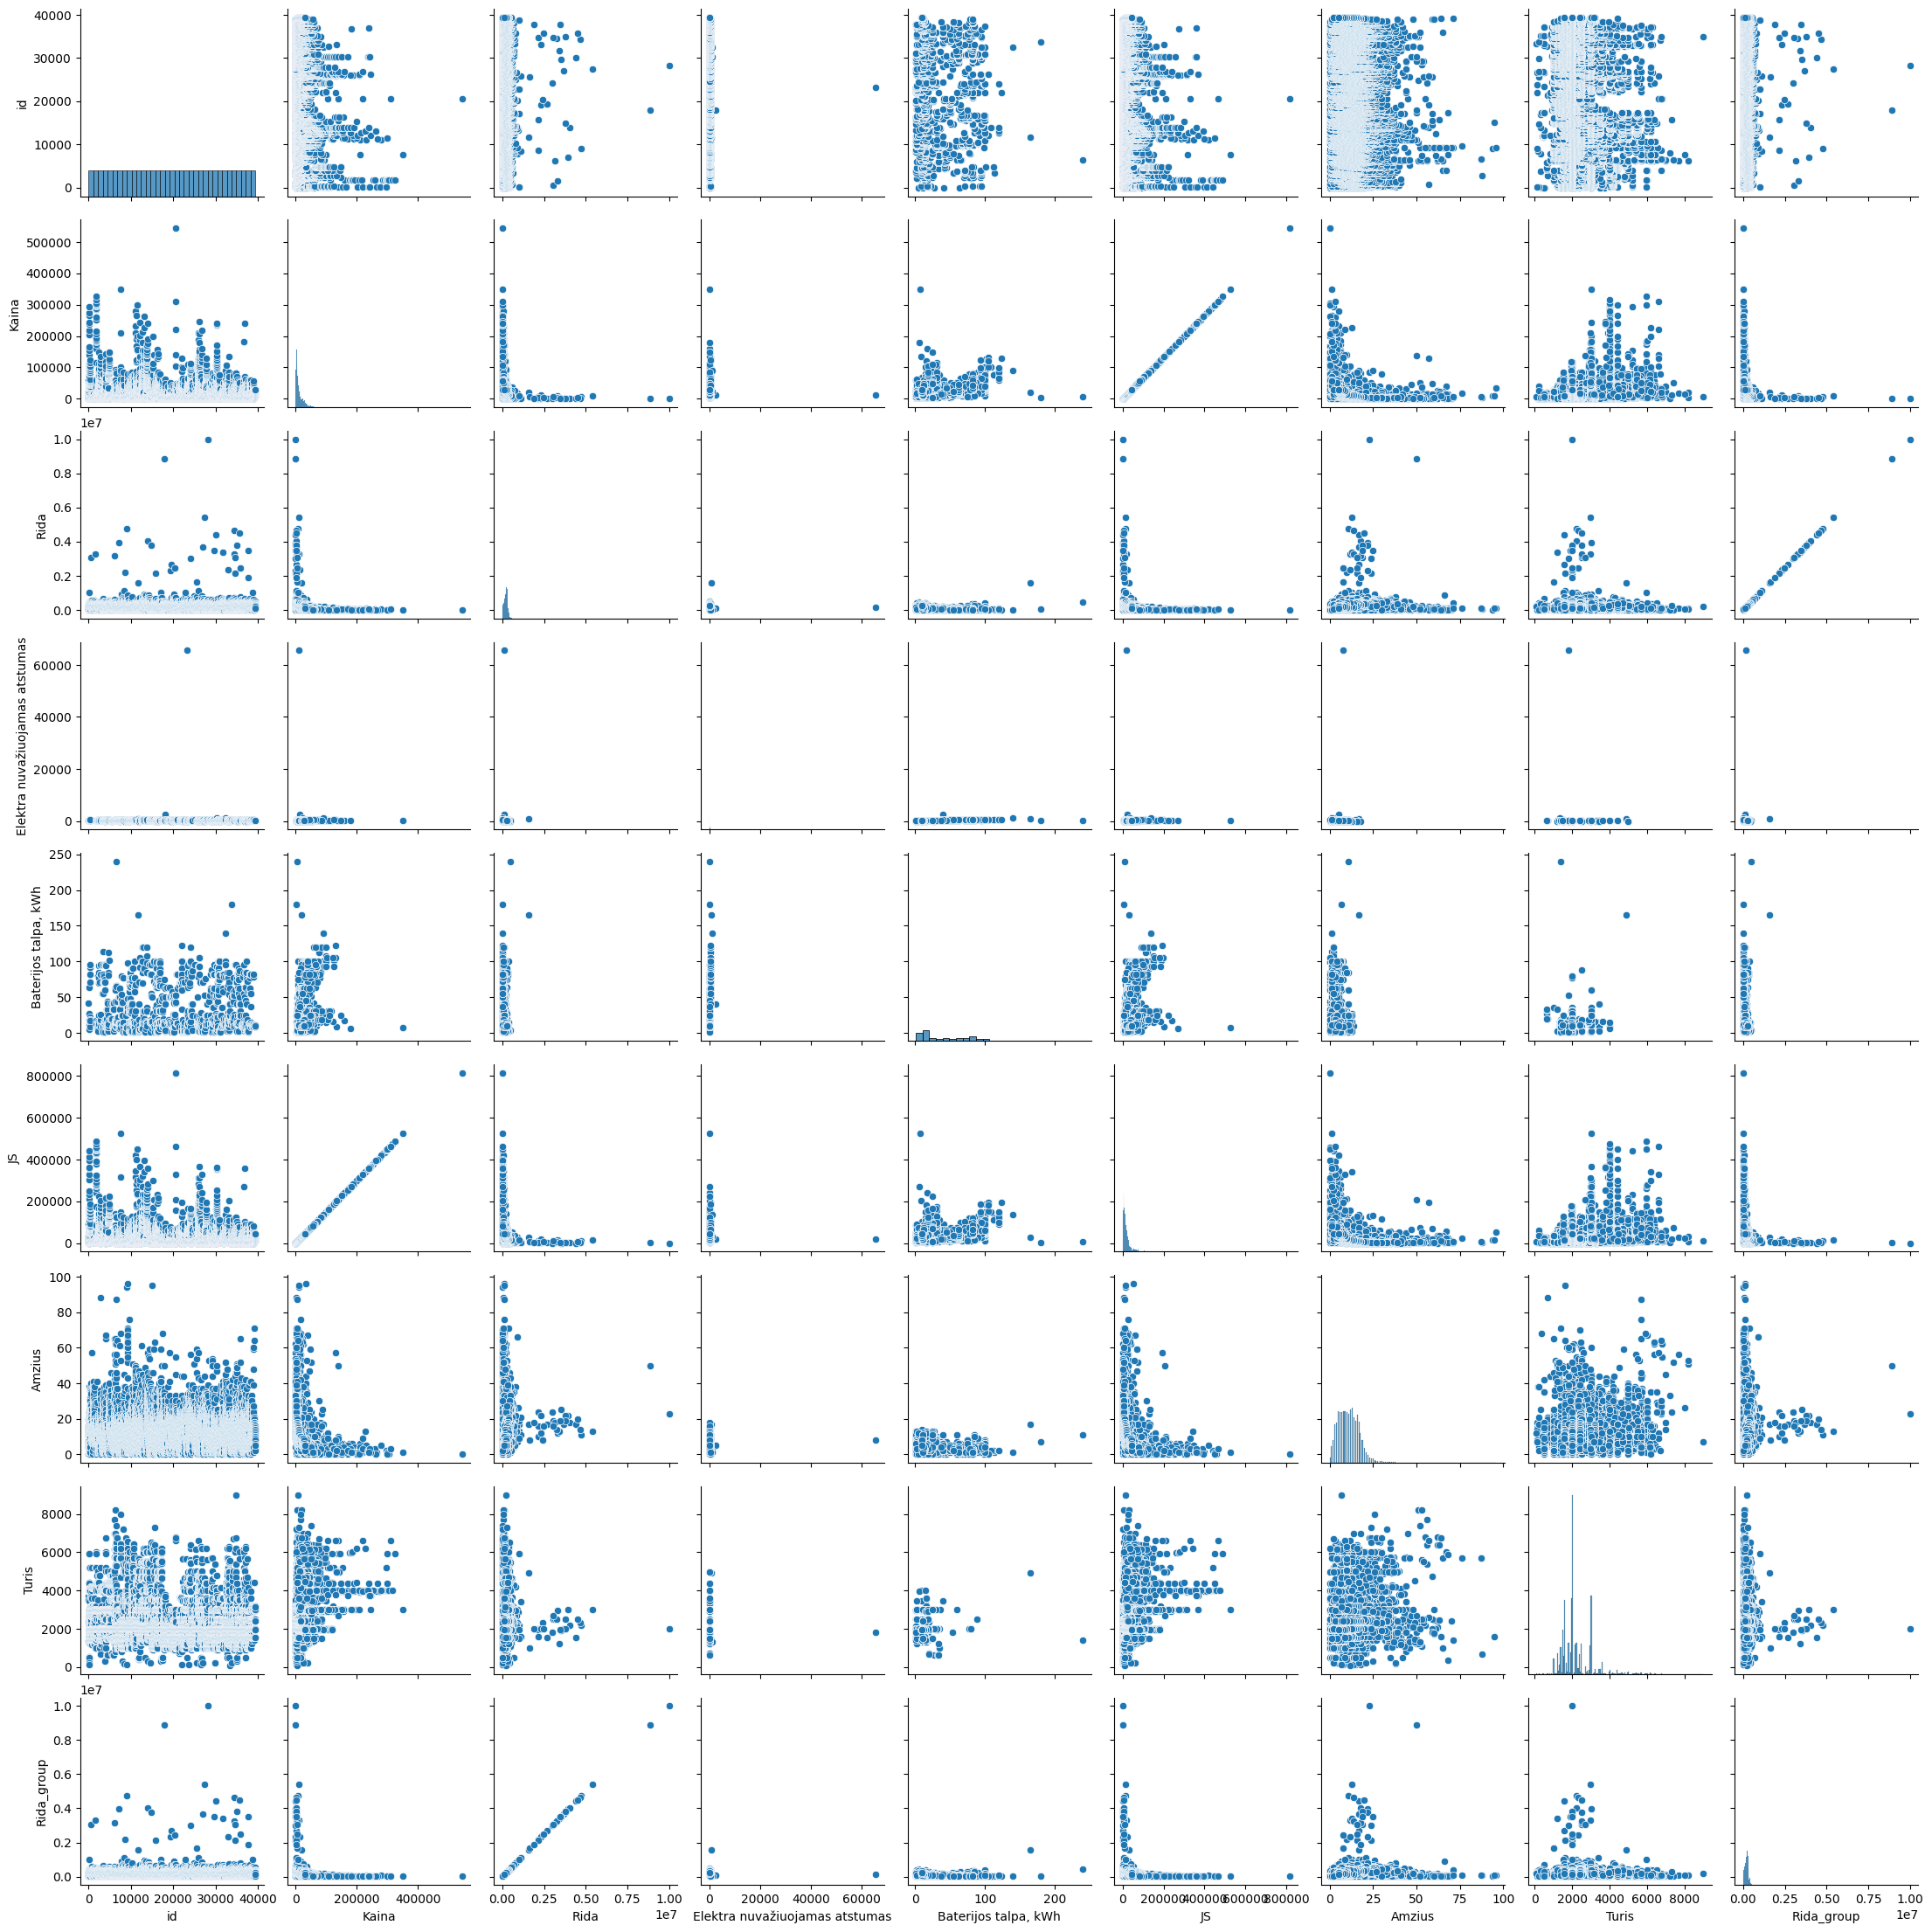

In [58]:
sns.pairplot(data=df_auto)

In [72]:
check= df_auto
# check = check.query(expr='Rida_group < 500000')
# check.dropna(inplace=True)
markes = list(df_auto.groupby(['Markė'])['Kaina'].count().reset_index().sort_values(by= 'Kaina',ascending=False)[:10]['Markė'])
for marke in markes:
    print(list(set(df_auto.query(expr= 'Markė == @marke & `Kuro tipas` == "Elektra"')['Modelis'])))
# modeliai = 

['i4', 'i7', 'i3s', 'iX1', 'i3', 'i5', 'iX', 'iX3']
['Q8 e-tron', 'e-tron Sportback', 'e-tron GT', 'e-tron', 'Q8 Sportback e-tron', 'Q4 e-tron']
['EQE', 'EQV', 'Vito', 'EQA', 'EQT', 'EQC', 'EQB', 'B Electric Drive', 'EQS']
['ID.5', 'Up', 'ID.4', 'Crafter', 'ID.Buzz', 'ID.3', 'ID.7', 'Golf']
['bZ4X', 'Proace City', 'Prius']
['Transit', 'Mustang Mach-E', 'Focus']
['Mokka', 'Rocks-e', 'Ampera', 'Corsa']
['XC40', 'C40']
['Enyaq']
['Traveller', '3008', '2008', '208', 'Partner', 'iOn']


In [67]:
markes

['BMW',
 'Audi',
 'Mercedes-Benz',
 'Volkswagen',
 'Toyota',
 'Ford',
 'Opel',
 'Volvo',
 'Skoda',
 'Peugeot']

In [77]:
test = df_auto.query(expr= 'Markė == "BMW" & Modelis == "i4"')[['Kaina','Rida_group', 'Amzius', 'Turis']]
test = df_auto.query(expr= 'Markė == "BMW"')[['Kaina','Rida_group', 'Amzius', 'Turis']]

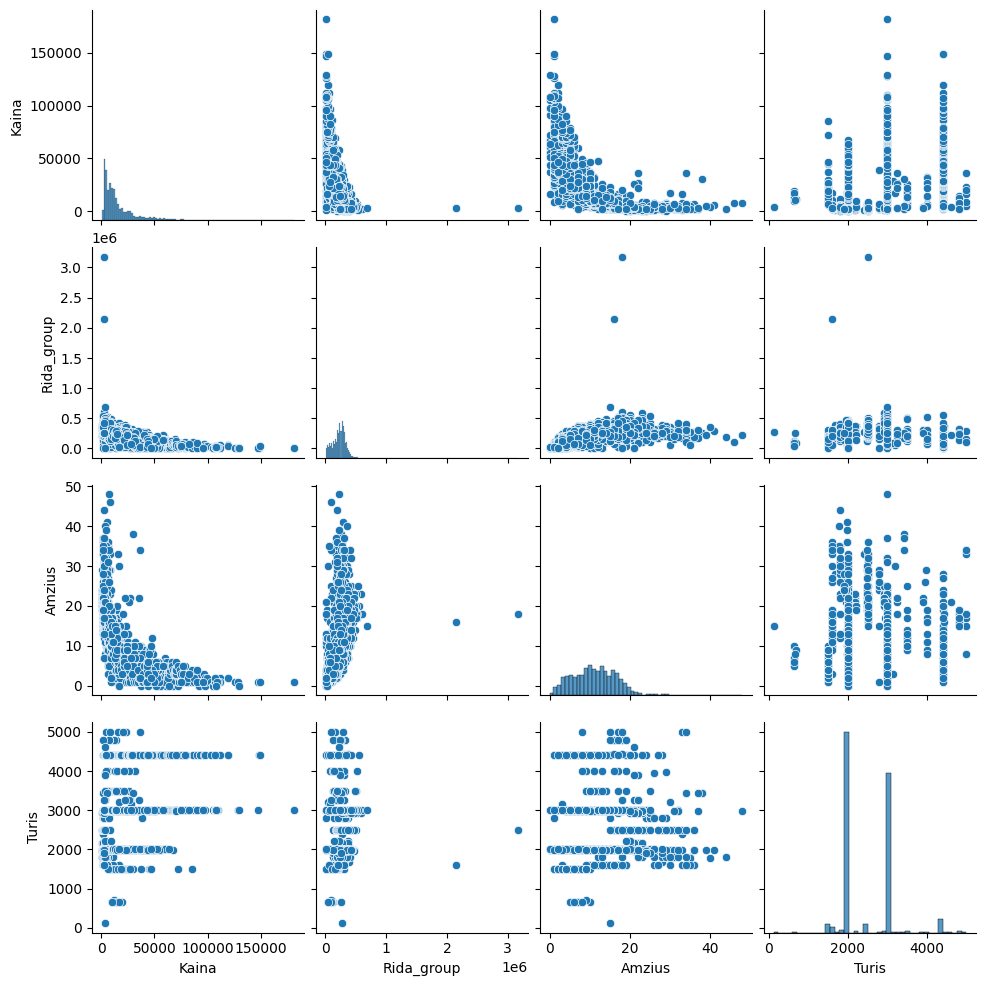

In [78]:
sns.pairplot(data=test)

In [80]:
import streamlit as st
import pandas as pd

# Sukuriame pavyzdinį DataFrame su atsitiktiniais duomenimis
data = {
    'id': range(1, 101),
    'value': range(100, 200)
}
df = pd.DataFrame(data)

st.title("DataFrame Filtravimas")

# Įvedimo laukai filtruoti "nuo" ir "iki" reikšmes
min_value = st.number_input("Nuo reikšmės:", min_value=int(df['value'].min()), max_value=int(df['value'].max()), value=int(df['value'].min()))
max_value = st.number_input("Iki reikšmės:", min_value=int(df['value'].min()), max_value=int(df['value'].max()), value=int(df['value'].max()))

# Filtruojame DataFrame pagal įvestas ribas
filtered_df = df[(df['value'] >= min_value) & (df['value'] <= max_value)]

st.write("Filtruoti duomenys:")
st.dataframe(filtered_df)


2024-11-13 21:07:59.016 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.282 
  command:

    streamlit run C:\Users\manta\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-13 21:07:59.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 21:07:59.287 Sess

DeltaGenerator()

In [ ]:
cols = df_auto.columns.tolist()

column_dict = {}
for col in df_auto.columns:
    # Patikriname, ar stulpelis yra skaitinis ar tekstinis
    if pd.api.types.is_numeric_dtype(df_auto[col]):
        # Jei skaitinis, reikšmė bus [min, max]
        column_dict[col] = [df_auto[col].min(), df_auto[col].max()]
    else:
        # Jei tekstinis, reikšmė bus unikalių reikšmių sąrašas
        column_dict[col] = df_auto[col].unique().tolist()

# Parodome sukurtą žodyną
print(column_dict)